In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import csv

Drop some unneccessary columns and stations from the data to reduce file size

In [2]:
"""df=pd.read_csv("data/dublinbikes.csv")
df_james=df.loc[(df["STATION ID"]==80)] #James hospital
df_portobello=df.loc[(df["STATION ID"]==43)] # portobello

df_james.to_csv('data/dublinbikes_james_hospital.csv',index=False)
df_portobello.to_csv('data/dublinbikes_portobello.csv',index=False)
"""

'df=pd.read_csv("data/dublinbikes.csv")\ndf_james=df.loc[(df["STATION ID"]==80)] #James hospital\ndf_portobello=df.loc[(df["STATION ID"]==43)] # portobello\n\ndf_james.to_csv(\'data/dublinbikes_james_hospital.csv\',index=False)\ndf_portobello.to_csv(\'data/dublinbikes_portobello.csv\',index=False)\n'

In [3]:
df_hospital=pd.read_csv("data/dublinbikes_james_hospital.csv")
df_portobello=pd.read_csv("data/dublinbikes_portobello.csv")

In [32]:
def process_dataframe(df):

    df.drop(columns=["ADDRESS","LATITUDE","LONGITUDE"],axis=1,inplace=True)
    df["TIME"]=pd.to_datetime(df["TIME"])
    df["LAST UPDATED"]=pd.to_datetime(df["LAST UPDATED"])

    df.sort_values(by=['TIME'],inplace=True)


    df["GAP"]=df["TIME"].diff().dt.seconds > (5*60 + 30)
    df["GAP AMOUNT"]=df["TIME"].diff().dt.seconds/60

    return df

In [33]:
df_hospital=process_dataframe(df_hospital)
df_portobello=process_dataframe(df_portobello)

AttributeError: 'NoneType' object has no attribute 'drop'

In [25]:

df_hospital.loc[df_hospital["GAP AMOUNT"]>6]

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,GAP,GAP AMOUNT
167,80,2020-01-03 00:05:02,2020-01-02 23:57:17,ST JAMES HOSPITAL (LUAS),40,17,23,Open,St James Hospital (Luas),53.341358,-6.292951,True,230.000000
475,80,2020-01-05 06:25:02,2020-01-05 06:21:28,ST JAMES HOSPITAL (LUAS),40,13,27,Open,St James Hospital (Luas),53.341358,-6.292951,True,285.000000
690,80,2020-01-13 00:05:27,2020-01-12 23:58:44,ST JAMES HOSPITAL (LUAS),40,25,15,Open,St James Hospital (Luas),53.341358,-6.292951,True,1430.416667
1176,80,2020-01-23 00:05:30,2020-01-22 23:58:08,ST JAMES HOSPITAL (LUAS),40,21,19,Open,St James Hospital (Luas),53.341358,-6.292951,True,455.466667
1510,80,2020-01-25 07:25:02,2020-01-25 07:23:35,ST JAMES HOSPITAL (LUAS),40,26,14,Open,St James Hospital (Luas),53.341358,-6.292951,True,215.000000
1678,80,2020-01-27 13:40:05,2020-01-27 13:38:42,ST JAMES HOSPITAL (LUAS),40,24,16,Open,St James Hospital (Luas),53.341358,-6.292951,True,980.050000
11012,80,2020-02-28 23:32:09,2020-02-28 23:23:07,ST JAMES HOSPITAL (LUAS),40,21,19,Open,St James Hospital (Luas),53.341358,-6.292951,True,7.116667
11017,80,2020-02-28 23:57:09,2020-02-28 23:47:36,ST JAMES HOSPITAL (LUAS),40,19,21,Open,St James Hospital (Luas),53.341358,-6.292951,True,7.116667
15687,80,2020-03-16 08:15:02,2020-03-16 08:13:56,ST JAMES HOSPITAL (LUAS),40,17,23,Open,St James Hospital (Luas),53.341358,-6.292951,True,194.983333
15689,80,2020-03-16 08:35:02,2020-03-16 08:32:42,ST JAMES HOSPITAL (LUAS),40,21,19,Open,St James Hospital (Luas),53.341358,-6.292951,True,15.000000


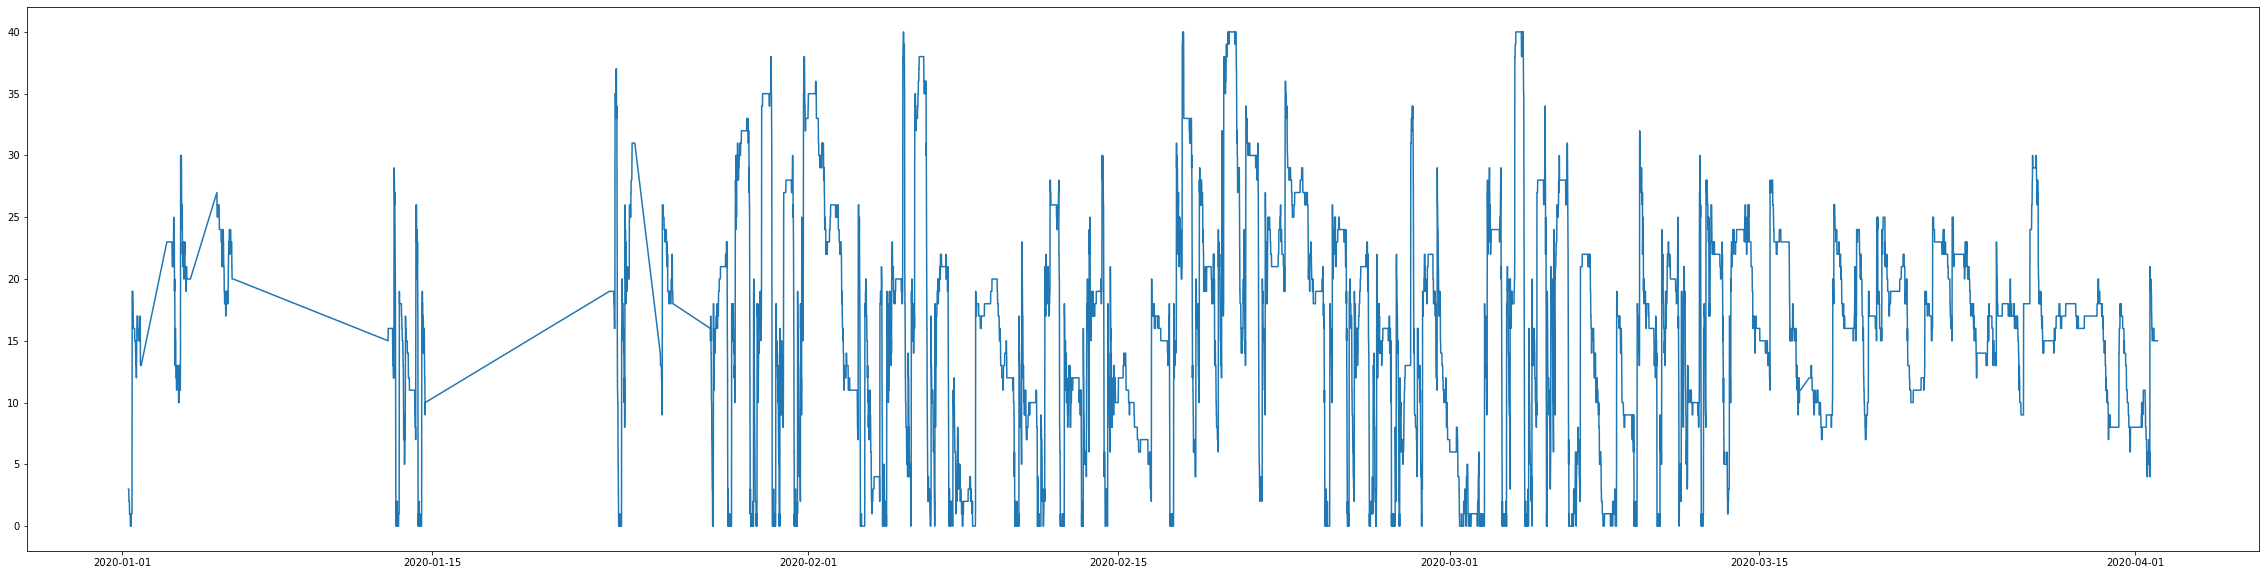

In [19]:

ig, ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(df_hospital["TIME"],df_hospital["AVAILABLE BIKES"])
plt.show()
